# PetFinder - Adopción de Mascotas

PetFinder.my es la plataforma líder de bienestar animal en Malasia, con más de 180.000 animales y 54.000 adopciones exitosas. 

PetFinder colabora estrechamente con amantes de los animales, medios de comunicación, empresas y organizaciones globales para mejorar el bienestar animal y cuenta con perfiles de las mascotas con datos  **Tabulares**, de **Texto Libre** e **Imágenes**

A veces, un perfil representa a un grupo de mascotas. En este caso, la velocidad de adopción está determinada por la velocidad a la que se adoptan todas las mascotas.

**Con la información disponible se busca predecir la velocidad a la que se adopta una mascota a través de la plataforma.**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from visualize import run_eda, transform_original_columns

In [2]:
#Subimos dos niveles para quedar en la carpeta que contiene input y UA_MDM_LDI_II
BASE_DIR = '../'

#Datos de entrenamiento 
PATH_TO_TRAIN = os.path.join(BASE_DIR, "PetFinder/input/train/train.csv")

#Reporte EDA
PATH_TO_EDA_REPORT = os.path.join(BASE_DIR, "EDA/EDA_report.html")

## Importar conjunto de datos

In [3]:
dataset_orig = pd.read_csv(PATH_TO_TRAIN)

## Definir variables a considerar en el EDA según tipo

In [4]:
# variables categoricas
categorical_cols = [
    "Type",
    "Gender",
    "MaturitySize",
    "FurLength",
    "Vaccinated",
    "Dewormed",
    "Sterilized",
    "Health",
]  # dataframe.select_dtypes(include="object").columns

# Formato variables categóricas que se encuentran como numéricas
dataset_orig = transform_original_columns(dataset_orig)


# variable numéricas
numeric_cols = dataset_orig.select_dtypes(include="number").columns

# filtrar campos que parecen ser numéricos pero no lo son
campos_num_categ = [
    "Breed1",
    "Breed2",
    "Color1",
    "Color2",
    "Color3",
    "State",
    "AdoptionSpeed",
]
numeric_cols = [col for col in numeric_cols if col not in campos_num_categ]


## Anáñisis Exploratorio de Datos (EDA)

### Información básica

Los datos presentes en el conjunto de datos son los siguientes:

* **PetID**: ID hash único del perfil de la mascota
* **AdoptionSpeed**: velocidad categórica de adopción. Un valor más bajo indica una adopción más rápida. **Esta es la variable objetivo o respuesta.**
* **Type**: Tipo de animal (1 = Perro, 2 = Gato)
* **Name**: Nombre de la mascota (Si no tiene nombre viene vacío).
* **Age**: Edad de la mascota al ser ingresada, en meses.
* **Breed1**: Raza principal de la mascota (Consultar el diccionario BreedLabels).
* **Breed2**: Raza secundaria de la mascota, si es de raza mixta (Consultar el diccionario BreedLabels)
* **Gender**: Género de la mascota (1 = Macho, 2 = Hembra, 3 = Mixto, si el perfil representa a un grupo de mascotas).
* **Color1**: Color 1 de la mascota (Consultar el diccionario ColorLabels).
* **Color2**: Color 2 de la mascota (Consultar el diccionario ColorLabels).
* **Color3**: Color 3 de la mascota (Consultar el diccionario ColorLabels).
* **MaturitySize**: amaño en la madurez (1 = Pequeño, 2 = Mediano, 3 = Grande, 4 = Extra grande, 0 = No especificado).
* **FurLength**: Longitud del pelaje (1 = Corto, 2 = Mediano, 3 = Largo, 0 = No especificado).
* **Vaccinated**: La mascota ha sido vacunada (1 = Sí, 2 = No, 3 = No está seguro).
* **Dewormed**: La mascota ha sido desparasitada (1 = Sí, 2 = No, 3 = No está seguro).
* **Sterilized**: Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** : Condición de salud (1 = Saludable, 2 = Lesión leve, 3 = Lesión grave, 0 = No especificado).
* **Quantity** : Número de mascotas representadas en el perfil.
* **Fee** : Tarifa de adopción (0 = Gratis).
* **State** : Ubicación por estado en Malasia (Consultar el diccionario StateLabels).
* **RescuerID** : ID hash único del rescatista.
* **VideoAmt** : Total de videos subidos de esta mascota.
* **PhotoAmt** : Total de fotos subidas de esta mascota.
* **Description** : Descripción del perfil de esta mascota. El idioma principal utilizado es inglés, con algunas en malayo o chino.

In [5]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "info basica")

Detalle conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           14993 non-null  category
 1   Name           13728 non-null  object  
 2   Age            14993 non-null  int64   
 3   Breed1         14993 non-null  int64   
 4   Breed2         14993 non-null  int64   
 5   Gender         14993 non-null  category
 6   Color1         14993 non-null  int64   
 7   Color2         14993 non-null  int64   
 8   Color3         14993 non-null  int64   
 9   MaturitySize   14993 non-null  category
 10  FurLength      14993 non-null  category
 11  Vaccinated     14993 non-null  category
 12  Dewormed       14993 non-null  category
 13  Sterilized     14993 non-null  category
 14  Health         14993 non-null  category
 15  Quantity       14993 non-null  int64   
 16  Fee            14993 non-null  int64   
 17  Stat

None

Se cuenta con un dataset de 24 columnas con 14993 registros.

### Valores Perdidos

\Valores perdidos:


Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

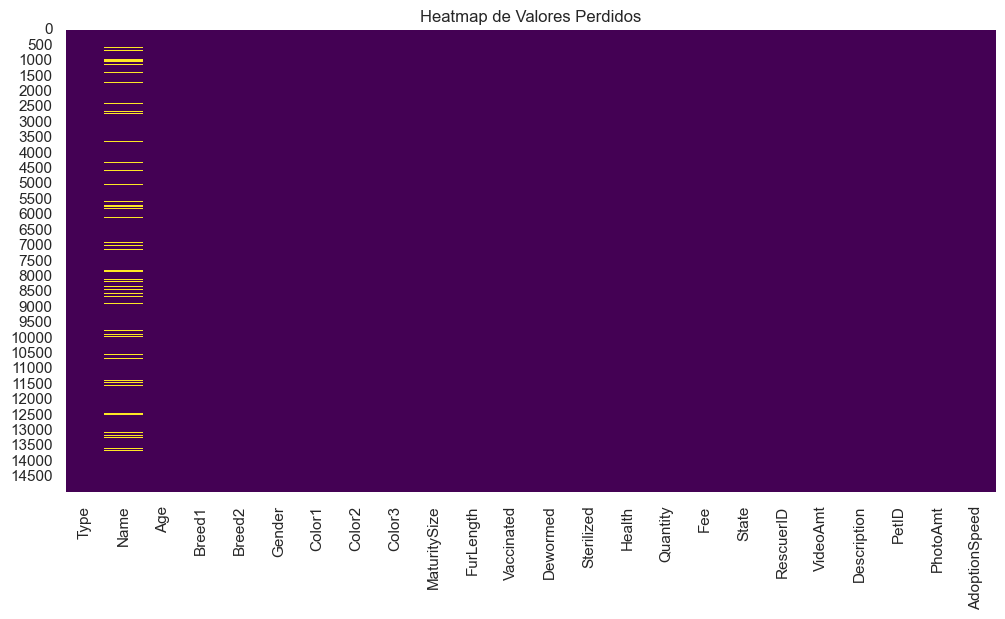

In [6]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "valores perdidos")

Las variables que presentan datos nulos son nombre y descripción. Quedando 1265 registros sin nombre y 13 sin descripción.

En ambos casos consideramos que no es un error sino que han sido omitidos adrede. Estas variables serán tratadas oportunamente.

### Nombre de la mascota (Campo 'Name')

ver codigos...

ver longitud nombres.... hay cortos...

ver sin nombre....

wordcloud....



### Distribución variables numéricas


Comportamiento Variables Numéricas:


,Age,Quantity,Fee,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.452078,1.576069,21.259988,0.056760,3.889215
std,18.155790,1.472477,78.414548,0.346185,3.487810
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,0.000000,0.000000,3.000000
75%,12.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,20.000000,3000.000000,8.000000,30.000000


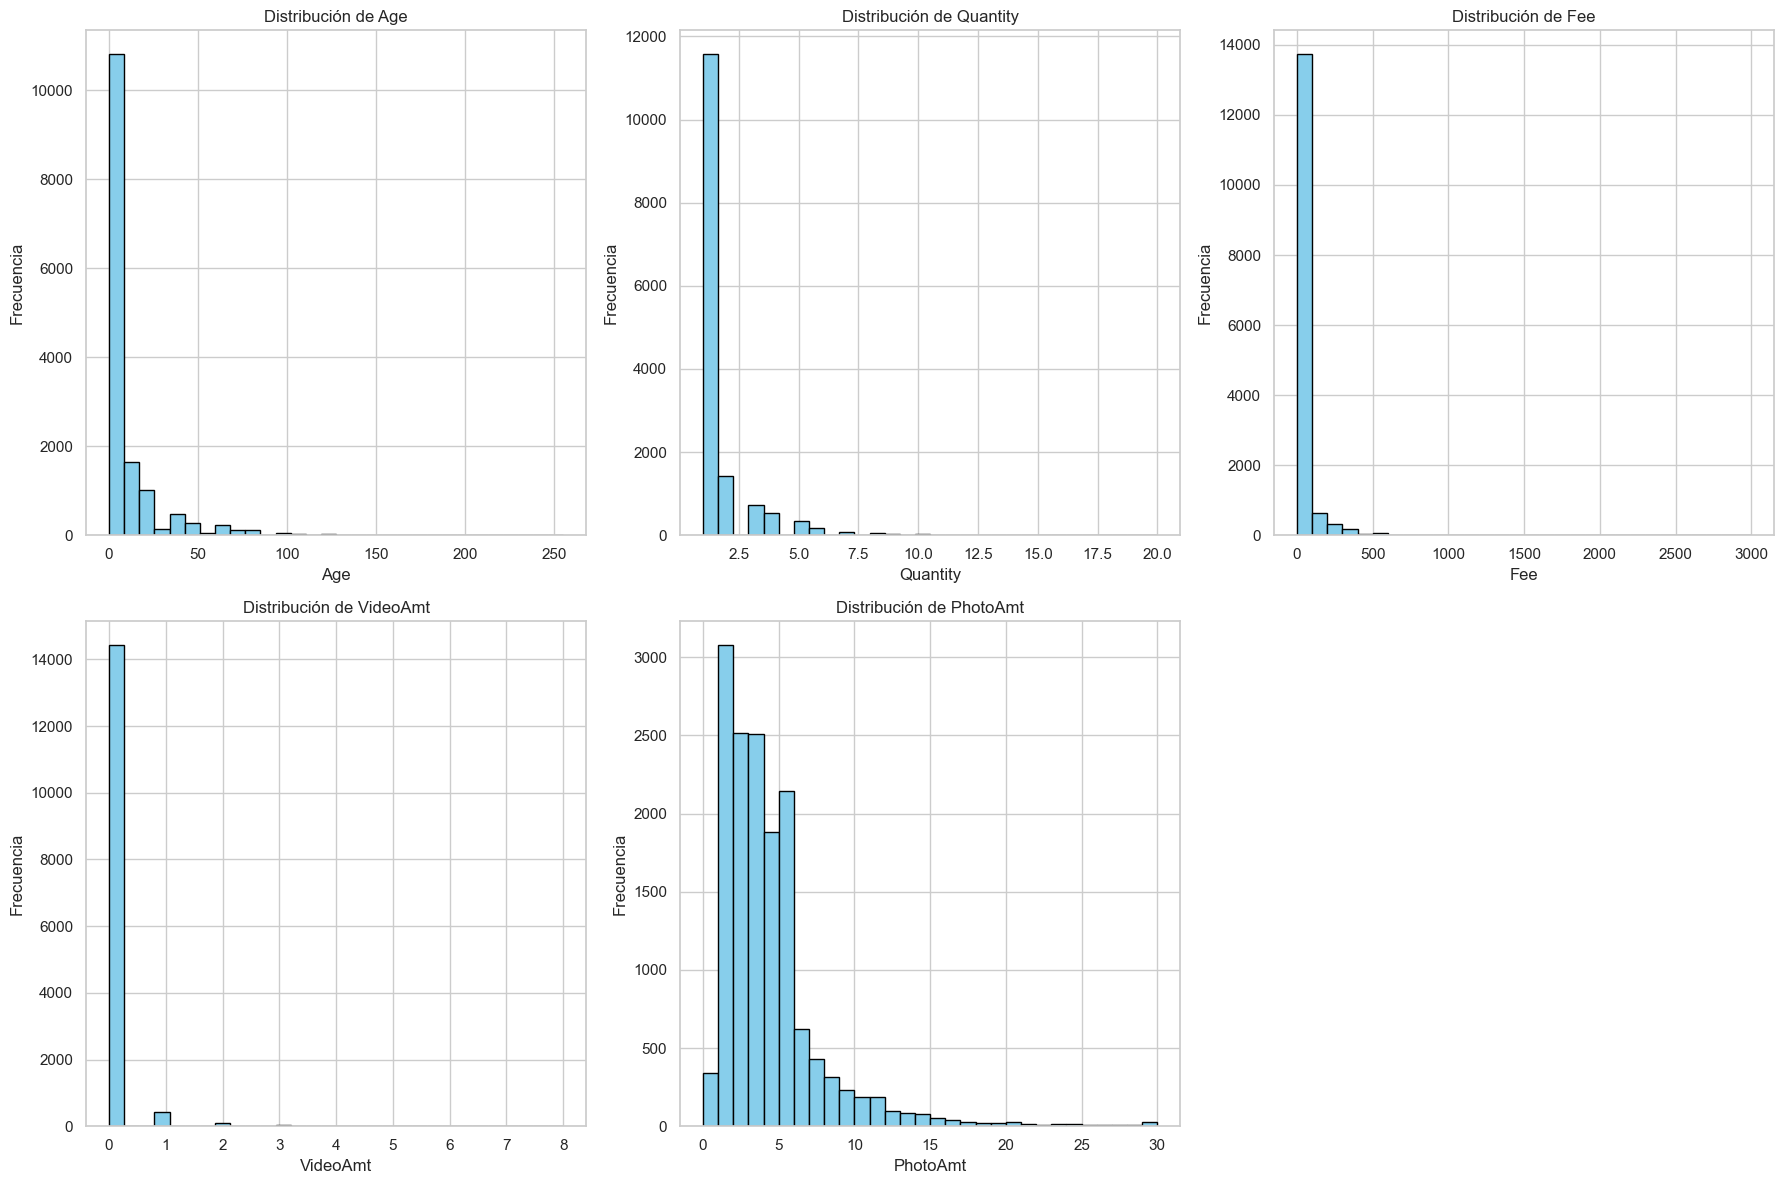

In [7]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "distribucion variables numericas")

Las variables numéricas se refieren a edad, cantidad de animales representados en el registro para su adopción, tarifa de adopción, cantidades de videos y fotos por registro. 

Todas ellas muestran distribuciones asimétricas por derecha lo que implica mayoría de animales jóvenes, registros de adopación individuales, gratuidad en adopciones, poca cantidad de complementos en imágenes y videos. Confirmando lo comentado en la primera aproximación hecha sobre los datos numéricos.

Las mascotas, entre perros y gatos tienen un promedio de edad de 10 meses. El 75% de los animales tiene hasta 12 meses. La mascota más vieja dada en adopción tiene 255 meses (más de 21 años)

La tarifa media de adopción de mascotas es de $21.25 aunque presenta una impórtante variabilidad alcanzando un máximo de $3000. Más del 75% han sido adopciones gratuitas.

Más del 75% de los registros poseen solo 1 mascota lo que implica que menos del 25% de los perfiles representan grupos de mascotas.

Casi todas las mascotas poseen fotos. El 75% de los registros cuentan con hasta 5 imágenes. 
El material en video es escaso, contando con ésto menos del 25% de los registros, los cuales incluyen hasta un máximo de 8 archivos.

### Distribución variables categóricas


Comportamiento Variables Categóricas:


Type
Dog    54%
Cat    46%
Name: proportion, dtype: object

Gender
Female    49%
Male      37%
Mixed     15%
Name: proportion, dtype: object

MaturitySize
Medium         69%
Small          23%
Large           8%
Extra Large     0%
Name: proportion, dtype: object

FurLength
Short     59%
Medium    36%
Long       5%
Name: proportion, dtype: object

Vaccinated
No          48%
Yes         39%
Not Sure    12%
Name: proportion, dtype: object

Dewormed
Yes         56%
No          32%
Not Sure    12%
Name: proportion, dtype: object

Sterilized
No          67%
Yes         21%
Not Sure    12%
Name: proportion, dtype: object

Health
Healthy           97%
Minor Injury       3%
Serious Injury     0%
Name: proportion, dtype: object

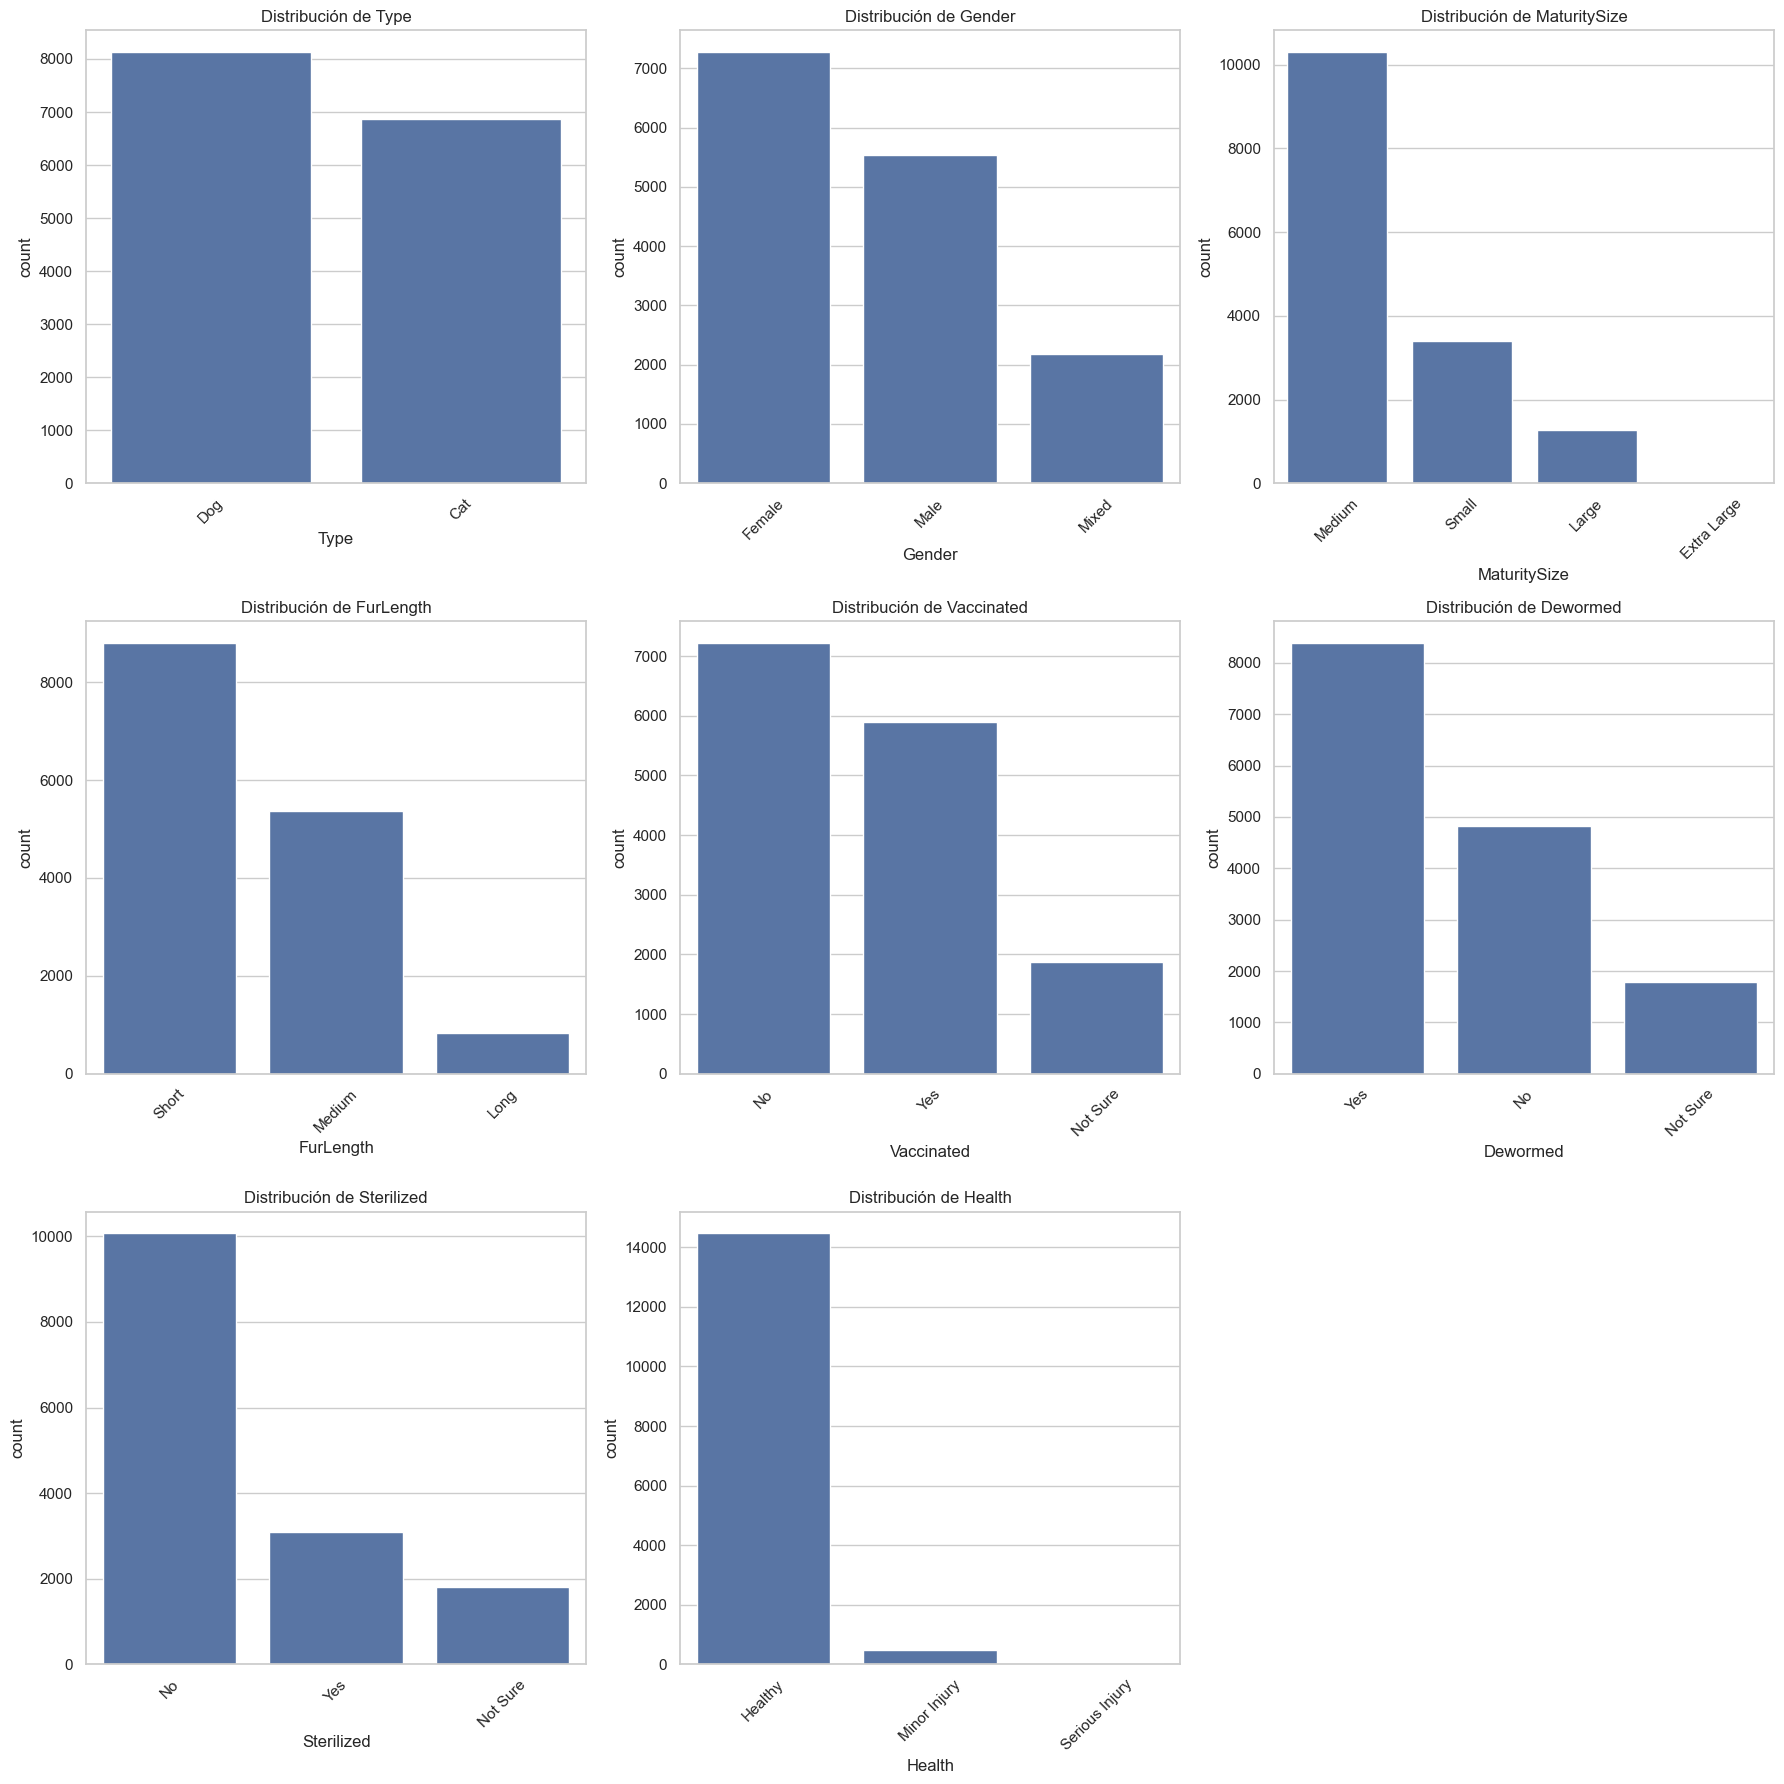

In [8]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "distribucion variables categoricas")

Se ve una mayor cantidad de perros (representando el 54% de las mascotas) en adopción por sobre los gatos.

El género registrado mayoritario corresponde a mascotas hembras aunque hay más de 2000 registros grupales identificados con género mixto (acumulando el 15% de la base).

En relación al tamaño de la mascota según su madurez predominan los medianos con más de 10.000 registros (representando casi el 70% de las mascotas).

La mayoría de las mascotas posee pelaje corto (59%).

La mayoria de las mascotas no está vacunada ni esterilizada. Quizás esto se deba a que no han alcanzado la edad mínima para ello. La mayoria se encuentra desparasitada y en buen estado de salud.

### Distribución variable respuesta "AdoptionSpeed"

Esta variable indica qué tan rápido se realiza la adopción un una mascota o un grupo de ellas. Los valores posibles son los siguientes

0 - La mascota fue adoptada el mismo día que fue registrada o anunciada.  
1 - La mascota fue adoptada entre 1 y 7 días (1ª semana) después de ser registrada.  
2 - La mascota fue adoptada entre 8 y 30 días (1er mes) después de ser registrada.  
3 - La mascota fue adoptada entre 31 y 90 días (2º y 3er mes) después de ser registrada.  
4 - No hubo adopción después de 100 días de haber sido registrada. 

(No hay mascotas en este conjunto de datos que esperaran entre 90 y 100 días).


In [9]:
print("Distribución de la variable respuesta:")
dataset_orig["AdoptionSpeed"].value_counts(normalize=True, dropna=False).mul(100).round(0).astype(int).astype(str)+'%'

Distribución de la variable respuesta:


AdoptionSpeed
4    28%
2    27%
3    22%
1    21%
0     3%
Name: proportion, dtype: object

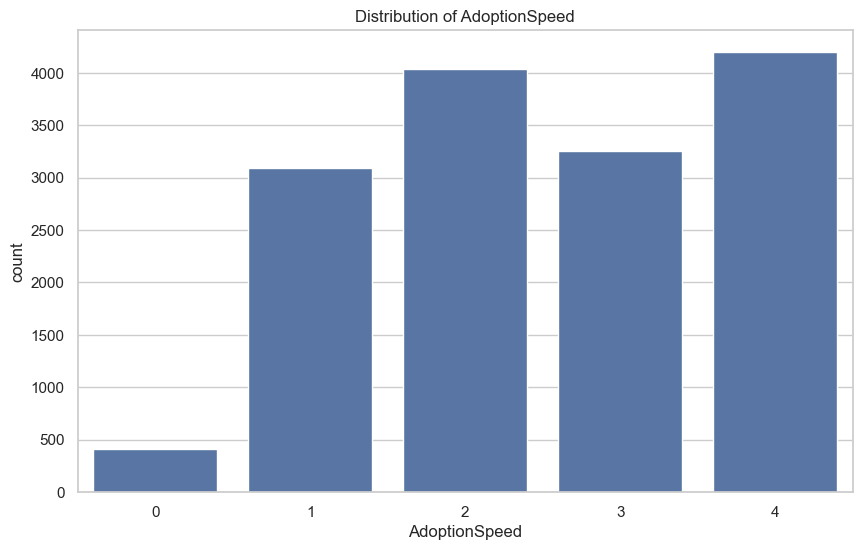

In [10]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "distribucion variable respuesta")

Lo menos frecuente es que una mascota sea adoptada el mismo día en que se anuncia (respresentando el 3% de las mascotas). La mayoría de las mismas no se adopten dentro de los primeros 100 días de anuncio.

### Relación variables categóricas con "AdoptionSpeed"

Los gráficos siguientes muetran las variables categóricas en relación a la velocidad de adopción (AdoptionSpeed):

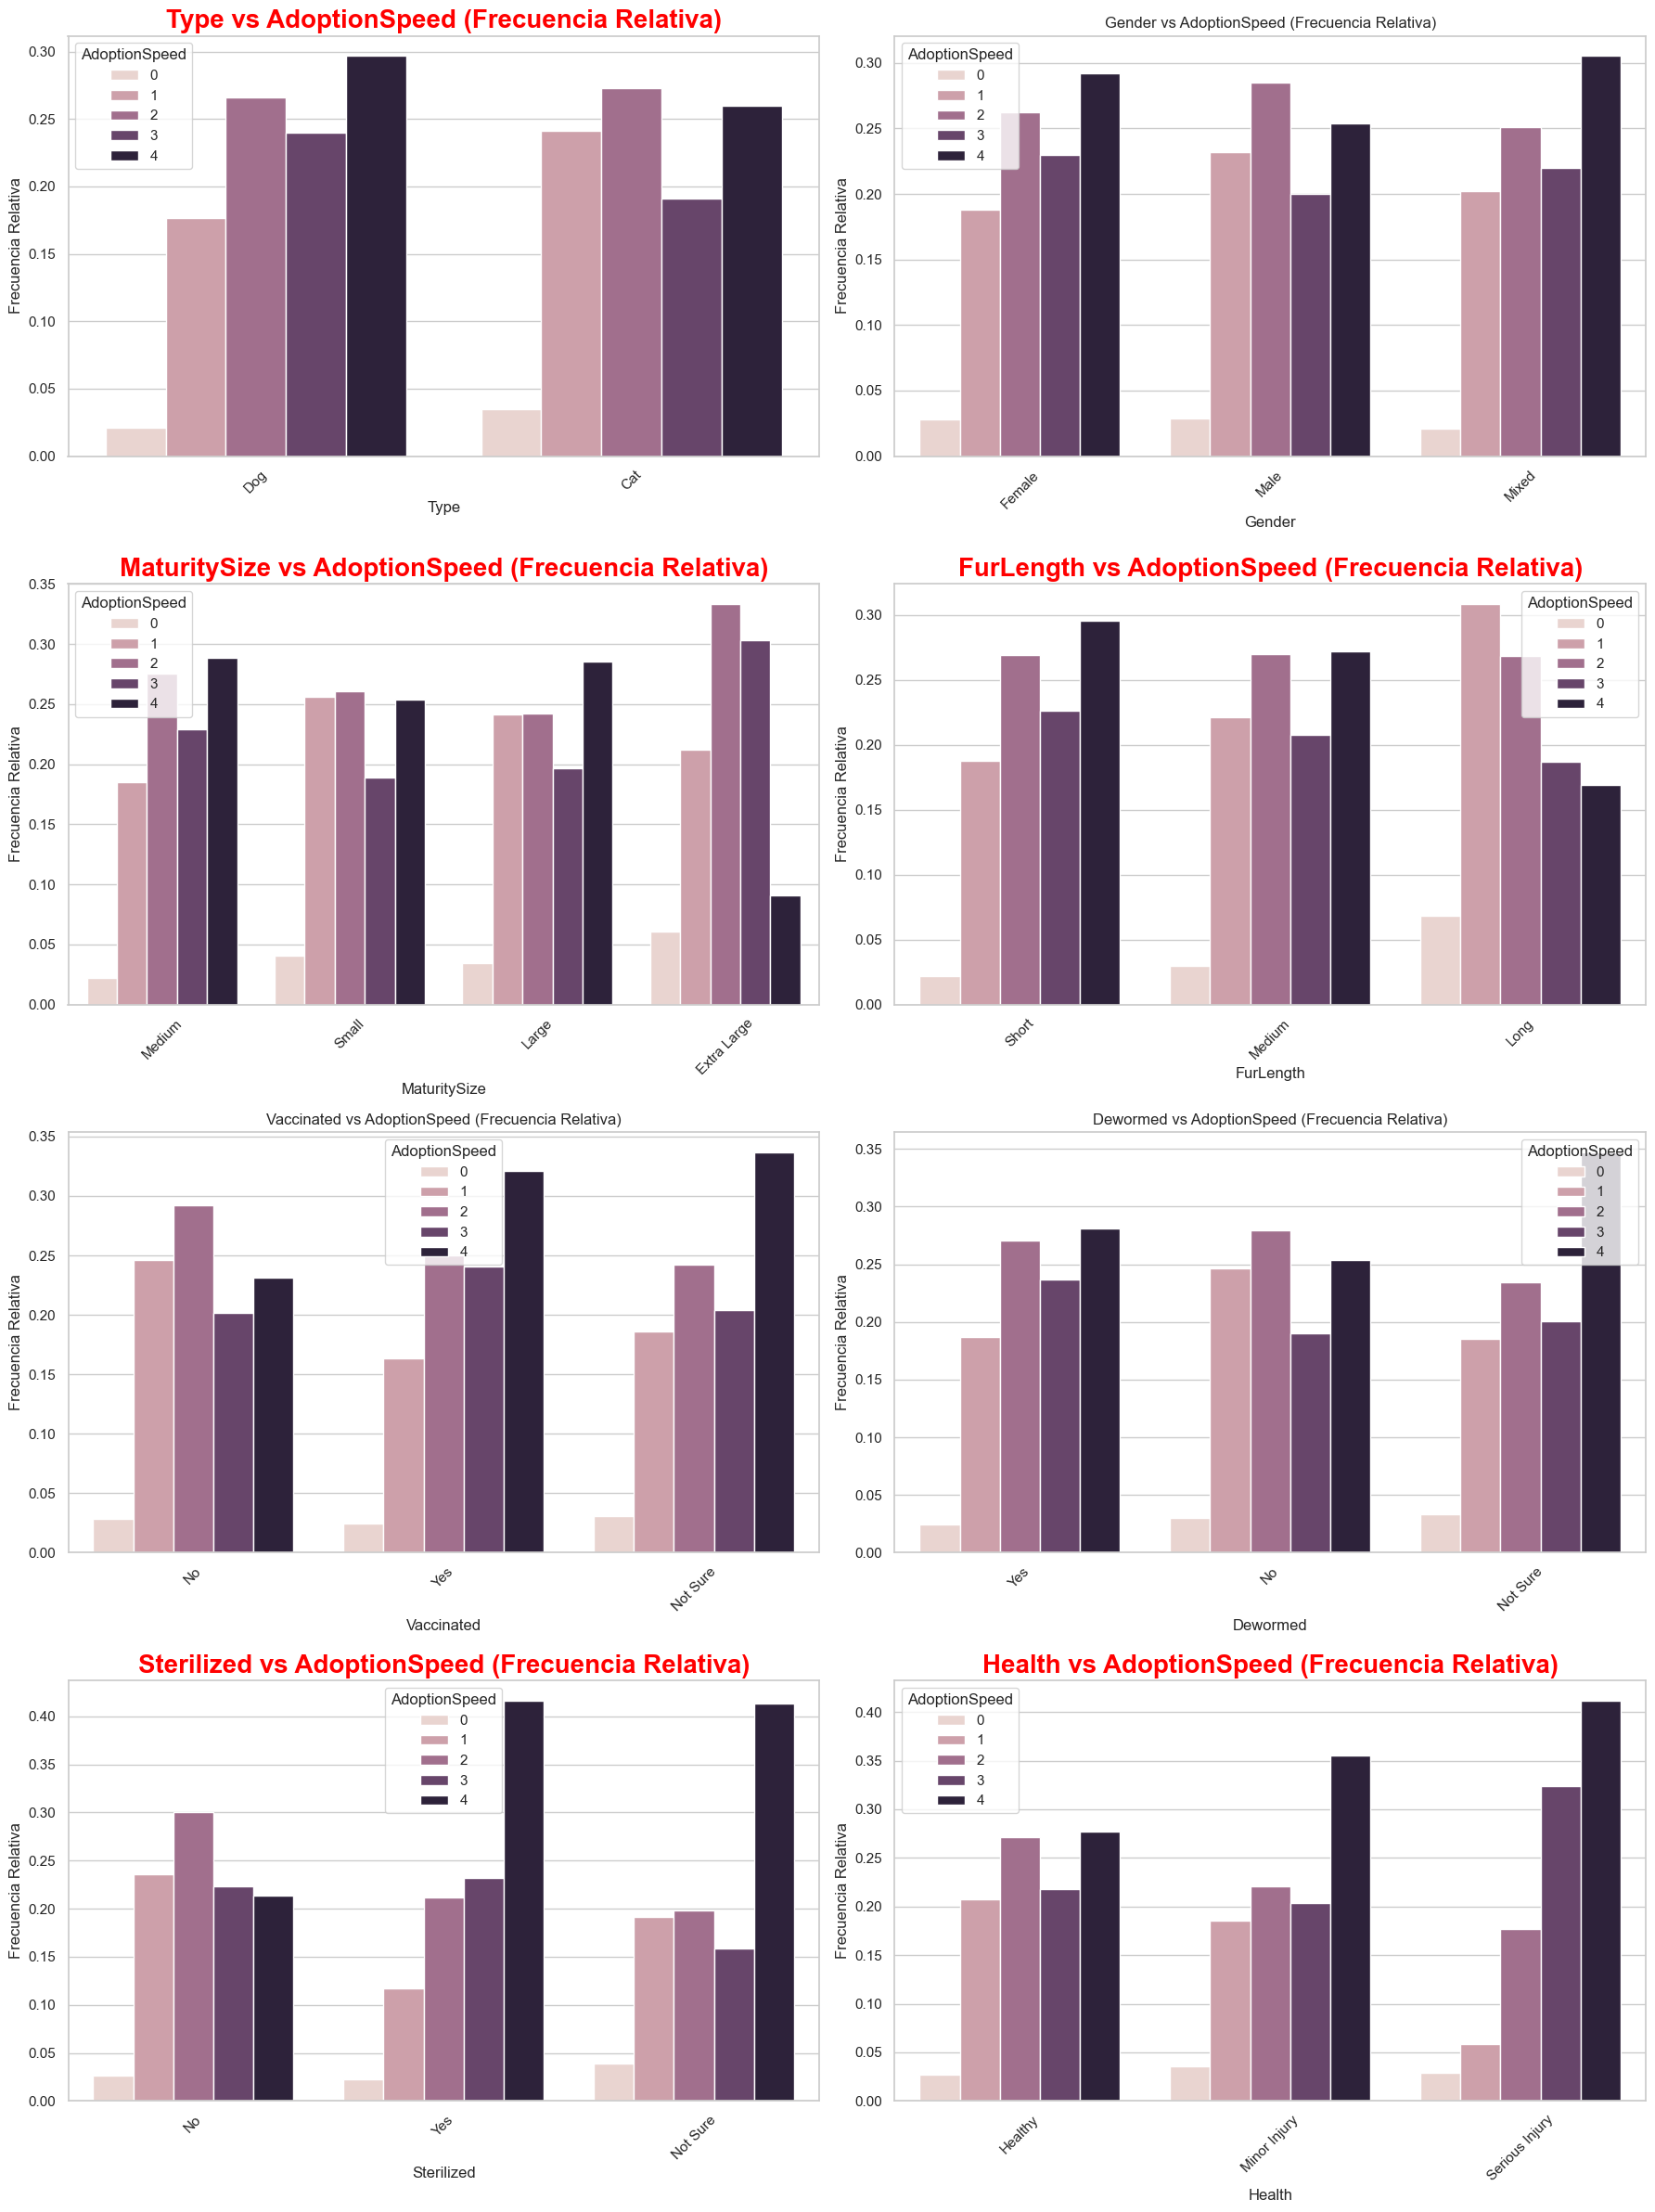

In [11]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "relacion variables categoricas con respuesta")

De lo visualizado, las variables que muestran una mayor influencia sobre la velocidad de adopción son las siguientes:

* Tipo (Type)
Los gatos parecen ser adoptados más rápido que los perros.

* Tamaño en relación a su madurez (MaturitySize)
La distribución de la velocidad de adopción para los animales de tamaño extra grande se diferencia notablemente de la de los demás tamaños. Su distribución es más simétrica, con una mayor frecuencia de adopciones el mismo día de publicación en comparación con los otros grupos. Además, muestra una menor frecuencia de adopciones en el nivel más alto de AdoptionSpeed (adopciones posteriores a los 100 días de publicación).

* Longitud de pelaje (FurLength)
Los animales de pelo largo se adoptan más rápido que los demás.

* Esterilizados (Sterilized)
Si bien parece que los animales que no están esterilizados tienen menor posibilidad de no ser adoptados antes de los 100 días esto podría deberse a la influencia de la edad de los mismos. Quizás al momento de ser adoptados no tienen edad para ser esterilizados.

* Salud (Health)
Los animales en mejor estado de salud son adoptados con mayor velocidad.

### Relación variables numéricas con "AdoptionSpeed"

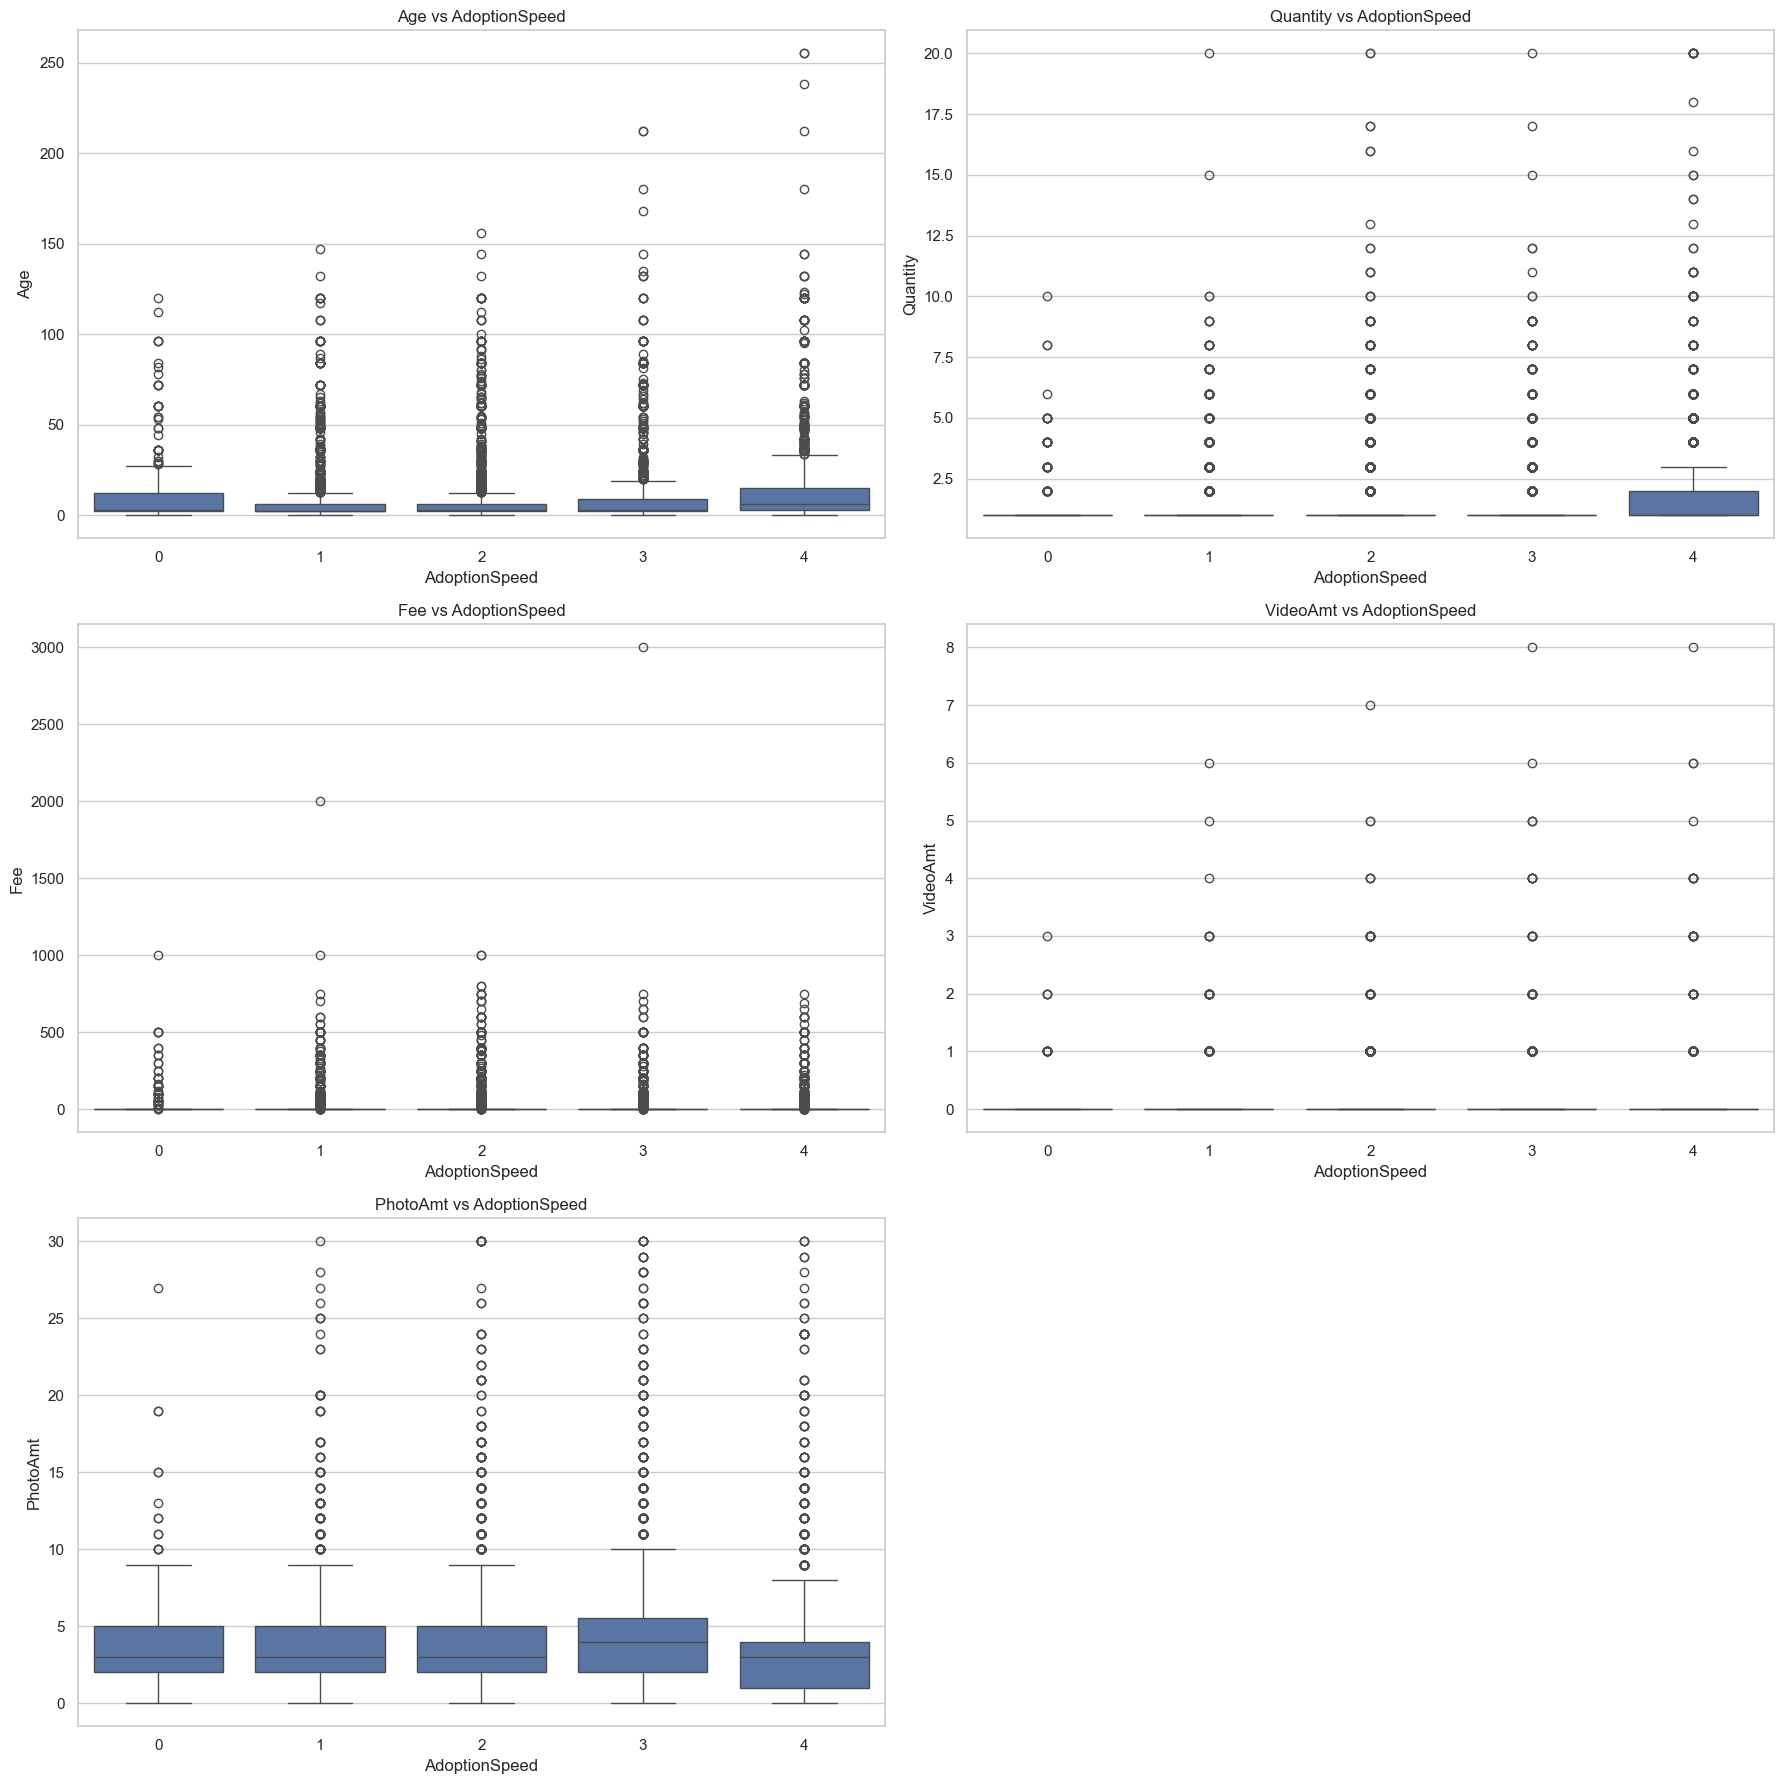

In [12]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "relacion variables numericas con respuesta")

De lo visualizado, las variables que muestran una mayor influencia sobre la velocidad de adopción son las siguientes:

* Edad (Age)
?

* Cantidad de mascotas por registro
Los grupos de mascotas esperan mayor tiempo para ser adoptadas adopción

* Cantidad de fotos
Las mascotas que tardan más de 100 días en ser adoptadas poseen menos fotos en promedio


### Matriz Correlación

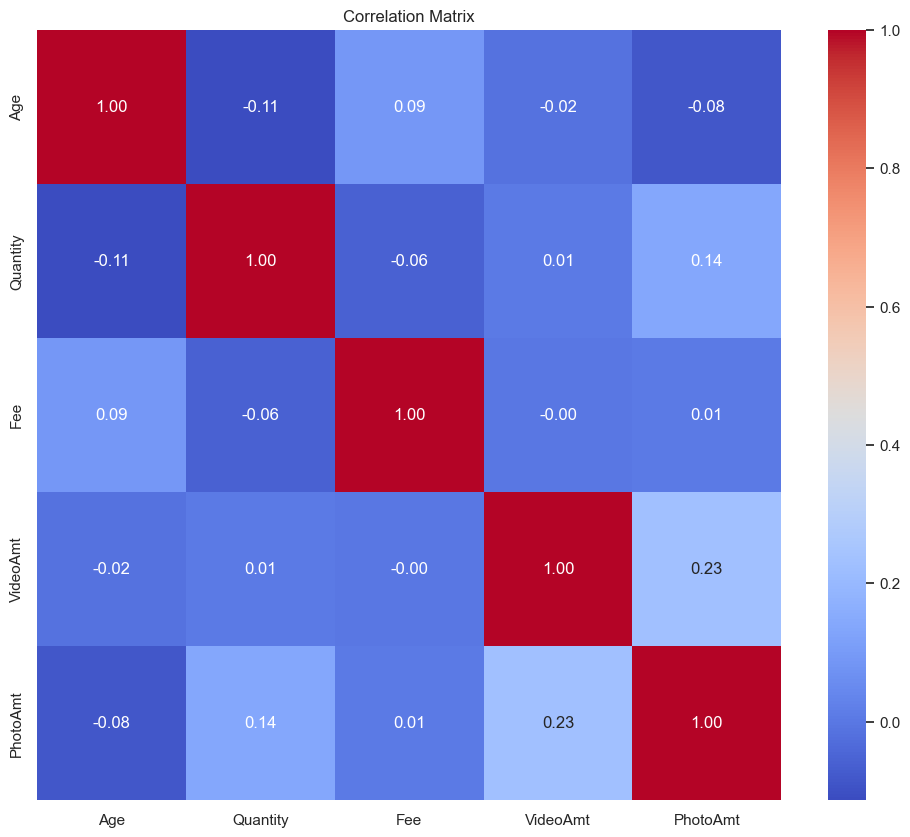

In [13]:
run_eda(dataset_orig, numeric_cols, categorical_cols, "matriz correlacion")

No hay correlación fuerte entre las variables numpericas.

La mayor correlación pobservada se da entre cantidad de fotos y videos. A mayor cantidad de fotos, mayor cantidad de videos aunque es bastante débil (0.23)


## Relación entre 3 variables (2 explicativas más AdoptionSpeed)

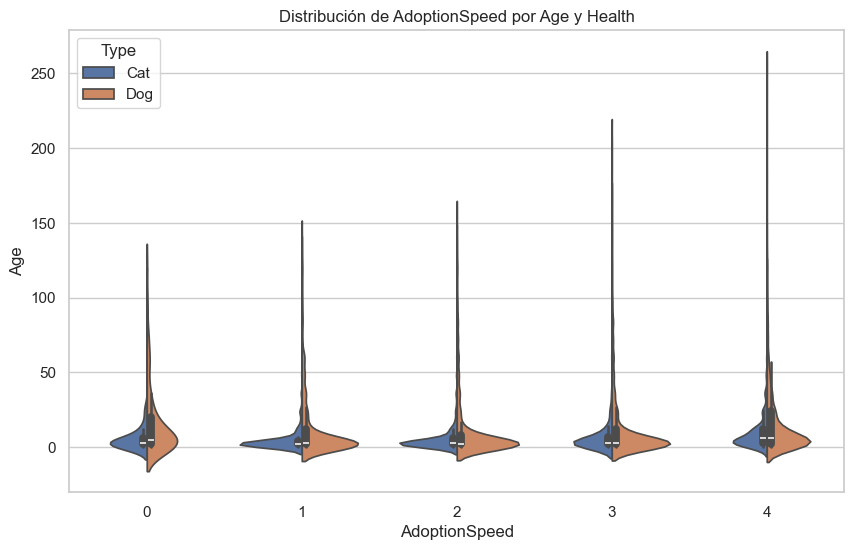

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AdoptionSpeed', y='Age', hue='Type', data=dataset_orig, split=True)
plt.title('Distribución de AdoptionSpeed por Age y Health')
plt.show()


Los gatos y los perros tienen distribuciones de edad bastante similares para cada categoría de AdoptionSpeed.

Los gatos parecen tener una leve tendencia a ser más jóvenes que los perros en algunas categorías de adopción rápida (como en AdoptionSpeed = 0).

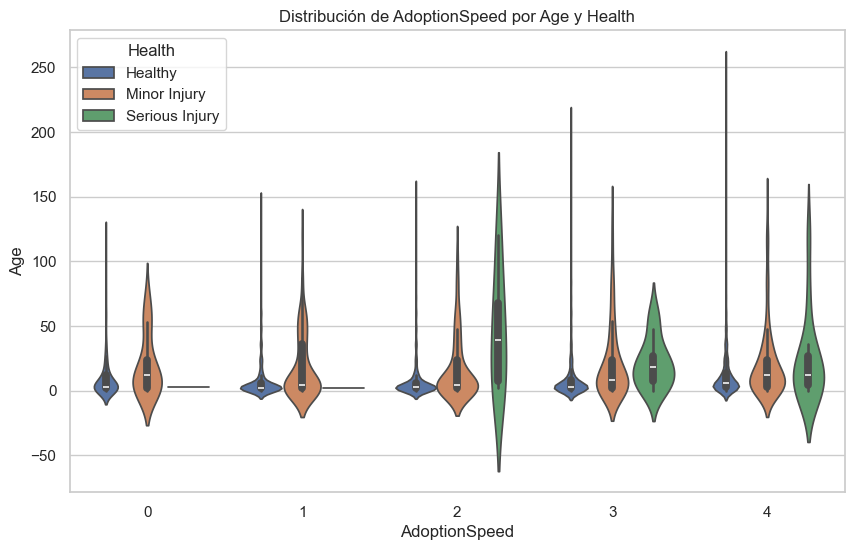

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AdoptionSpeed', y='Age', hue='Health', data=dataset_orig, split=False)
plt.title('Distribución de AdoptionSpeed por Age y Health')
plt.show()


Los animales saludables tienden a ser adoptados más rápido en comparación con aquellos que tienen lesiones.

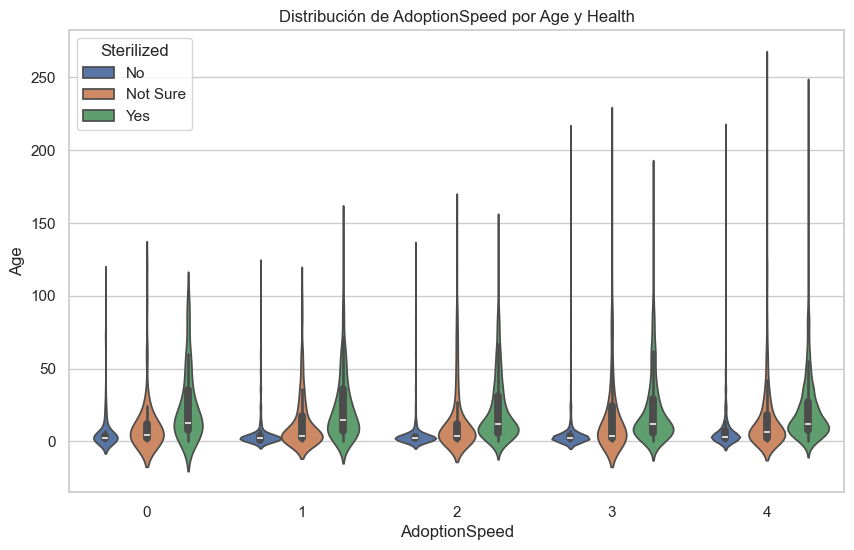

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AdoptionSpeed', y='Age', hue='Sterilized', data=dataset_orig, split=False)
plt.title('Distribución de AdoptionSpeed por Age y Health')
plt.show()


Los animales de mayor edad son más propensos a haber sido esterilizados.

## Top 5 variables Tabulares

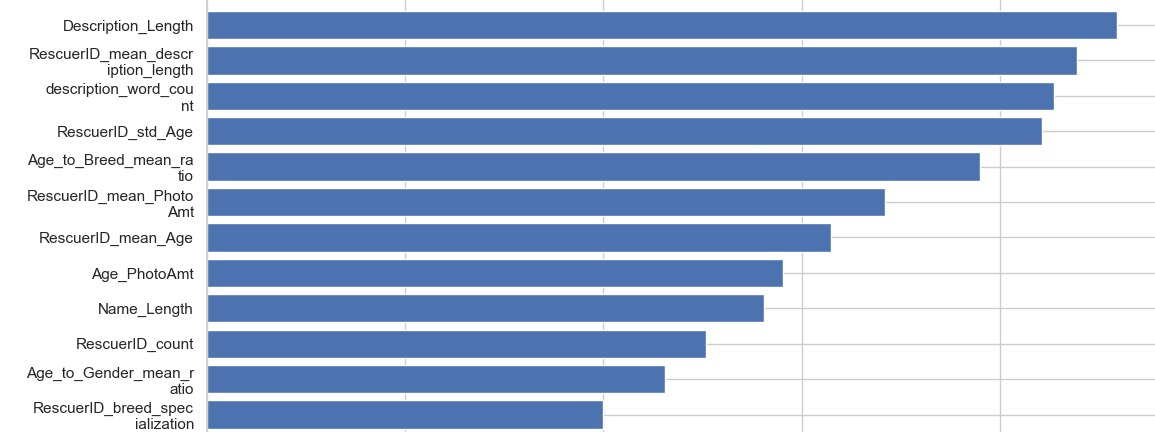

crear las variables nuevas más importantes...

incluir los graficos/tablas y descripciones....